In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/train.csv")
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

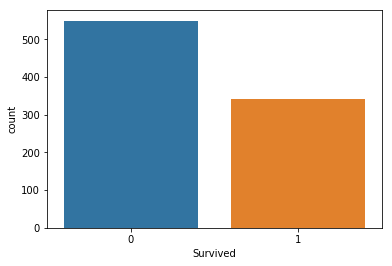

In [6]:
sns.countplot(df["Survived"])

### 性別

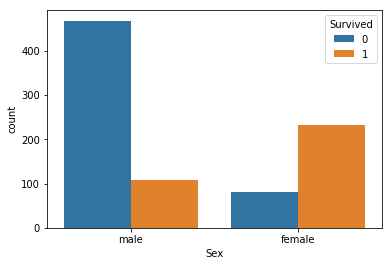

In [7]:
sns.countplot(df.Sex, hue=df.Survived)

In [8]:
df.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### 年齢

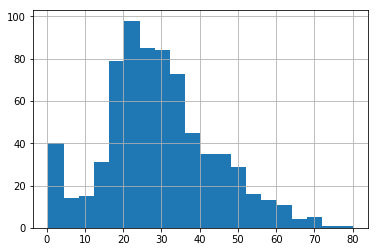

In [9]:
df["Age"].hist(bins=20)

In [10]:
df["Age"].isnull().sum()

177

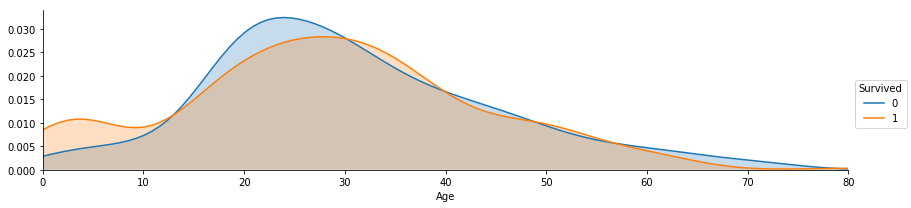

In [11]:
a = sns.FacetGrid(df, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , df['Age'].max()))
a.add_legend()

### 同乗者

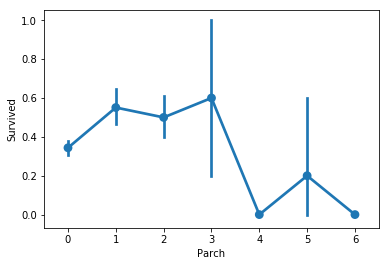

In [12]:
#両親,子供の数
sns.pointplot("Parch", "Survived", data=df)

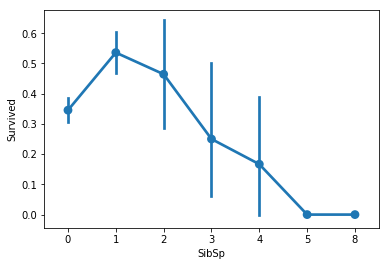

In [13]:
#兄弟の数
sns.pointplot("SibSp", "Survived", data=df)

In [14]:
df["FamilySize"] = df["Parch"] + df["SibSp"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


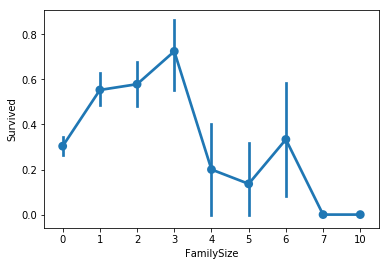

In [15]:
sns.pointplot("FamilySize", "Survived", data=df)

In [16]:
df["IsAlone"] = 1
df.loc[df["FamilySize"] > 0, "IsAlone"] = 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


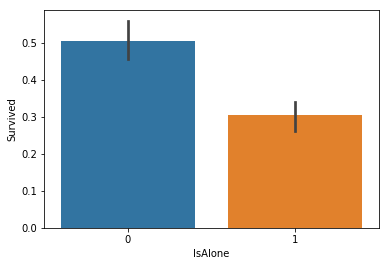

In [17]:
sns.barplot("IsAlone", "Survived",  data=df)

### 客室クラス

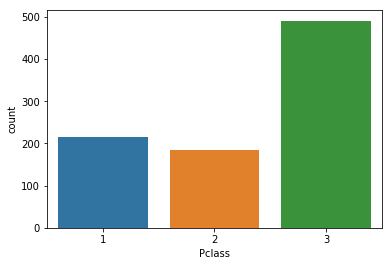

In [18]:
sns.countplot("Pclass", data=df)

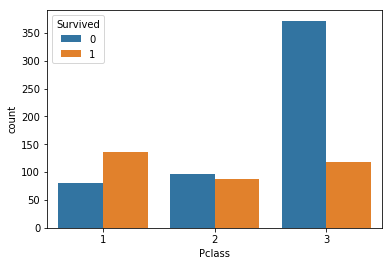

In [19]:
sns.countplot("Pclass", hue="Survived", data=df)

### Nameから敬称を取り出す

In [20]:
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr


In [21]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

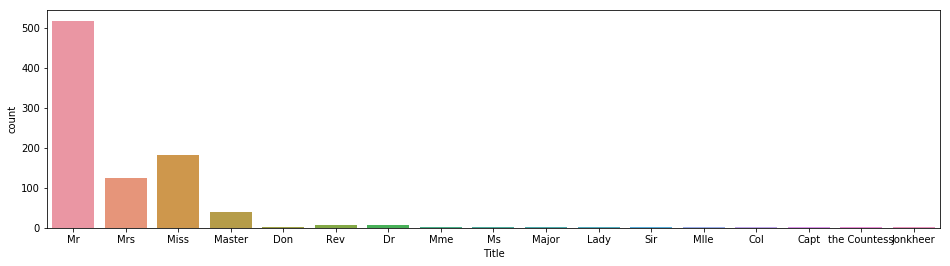

In [22]:
plt.figure(figsize=(16,4))
sns.countplot(df["Title"])

In [23]:
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme':'Mrs'})
fixed_title = ["Mr", "Miss", "Mrs", "Master"]
#一般的でない敬称についてはデータ数が少ないため、Rareにまとめる
df.loc[~(df["Title"].isin(fixed_title)), "Title"] = "Rare"

In [24]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

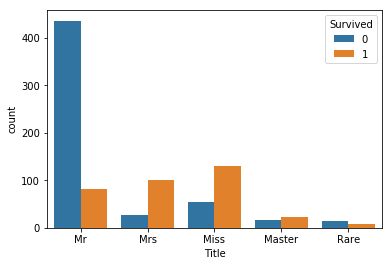

In [25]:
sns.countplot("Title", hue="Survived", data=df)

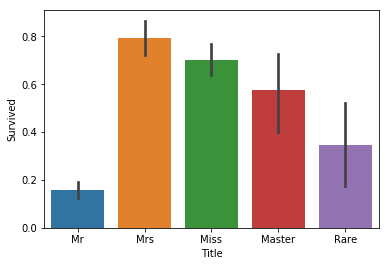

In [26]:
sns.barplot("Title", "Survived", data=df)

In [27]:
df.groupby(["Title"])["Survived"].mean()

Title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
Rare      0.347826
Name: Survived, dtype: float64

In [28]:
X = df[["Sex", "Age", "FamilySize", "IsAlone", "Title", "Pclass"]]
y = df["Survived"]

In [29]:
X.head()

,Sex,Age,FamilySize,IsAlone,Title,Pclass
0,male,22.0,1,0,Mr,3
1,female,38.0,1,0,Mrs,1
2,female,26.0,0,1,Miss,3
3,female,35.0,1,0,Mrs,1
4,male,35.0,0,1,Mr,3


In [30]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Sex           891 non-null object
Age           714 non-null float64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
Pclass        891 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


In [32]:
X["Sex"] = X["Sex"].replace({"male":0, "female":1})
X.head()

C:\Users\tomiyou\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sex,Age,FamilySize,IsAlone,Title,Pclass
0,0,22.0,1,0,Mr,3
1,1,38.0,1,0,Mrs,1
2,1,26.0,0,1,Miss,3
3,1,35.0,1,0,Mrs,1
4,0,35.0,0,1,Mr,3


In [33]:
X = X[["Sex", "Age", "FamilySize", "IsAlone", "Pclass"]]
X.head()

,Sex,Age,FamilySize,IsAlone,Pclass
0,0,22.0,1,0,3
1,1,38.0,1,0,1
2,1,26.0,0,1,3
3,1,35.0,1,0,1
4,0,35.0,0,1,3


In [34]:
X.isna().sum()

Sex             0
Age           177
FamilySize      0
IsAlone         0
Pclass          0
dtype: int64

In [35]:
X["Age"] = X["Age"].fillna(X["Age"].mean())
X["Age"] = X["Age"].astype(np.int)
X.isna().sum()

Sex           0
Age           0
FamilySize    0
IsAlone       0
Pclass        0
dtype: int64

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Sex           891 non-null int64
Age           891 non-null int32
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Pclass        891 non-null int64
dtypes: int32(1), int64(4)
memory usage: 31.4 KB


In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
dtree.score(X, y)

0.9135802469135802

In [43]:
from sklearn import tree
tree.export_graphviz(dtree, "./dtree.dot", max_depth=3,
                     feature_names=X.columns, class_names=["Dead", "Survived"])